<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p class="mb-0"><strong>Комментарий:</strong></p>
<!--     <p class="mb-0"><strong>Исправление:</strong></p> -->
    <p class="mb-0">Здравствуй, Александр, спасибо за проверку.</p>
</div>

# Анализ Модели

## Исследовательский анализ данных

In [1]:
import os
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import rcParams

**Настроим графики по+красоте.** ✨

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

In [4]:
dpi_k = custom_params['figure.dpi'] / rcParams['figure.dpi']
px = 1/custom_params['figure.dpi']

**Функции:**

In [5]:
def to_px(size_px):
    px_density = int(
        round(
            size_px * px * dpi_k
        )
    )
    return px_density

In [6]:
def plot_hist(data, title='Histogram', custom_params=custom_params):
    with mpl.rc_context(custom_params):
        plt.hist(
            data,
            bins=100, #len(data.unique())
            color='darkgreen'
        )
        plt.title(
                title,
                fontdict={'fontsize': 'large'}
            )
        plt.xlabel('Возраст')
        plt.ylabel('Количество')
        plt.show()

In [7]:
try:
    with open('/datasets/faces/labels.csv', 'r') as f_csv:
        labels_df = pd.read_csv(f_csv)
        PATH_TO = '/datasets/faces/'
        PATH_TO_IMG = PATH_TO + 'final_files'
        print('load cloud version of dataset')
except FileNotFoundError:
    PATH_TO = './datasets/'
    PATH_TO_CSV = PATH_TO + 'labels.csv'
    PATH_TO_IMG = PATH_TO + 'final_files/final_files'

    try:
        labels_df = pd.read_csv(PATH_TO_CSV)
        print('load local version of dataset')
    except FileNotFoundError:
        !kaggle datasets download -d abhikjha/appa-real-face-cropped
        !unzip -q appa-real-face-cropped.zip -d datasets
        labels_df = pd.read_csv(PATH_TO_CSV)
        print('load kaggle version of dataset')

load local version of dataset


In [8]:
def get_pop_ages(df=labels_df,
                start_age=labels_df['real_age'].min(),
                end_age=labels_df['real_age'].max(),
                amnt_to_return=5):
    
    pop_ages = df.loc[
            (df['real_age'] >= start_age)
            & (df['real_age'] < end_age)
        ].groupby(by='real_age').count().sort_values(
                by='file_name',
                ascending=False
            )
    return pop_ages[: amnt_to_return]

In [9]:
AGE_YEAR = [1]
AGE_YEAR.extend(list(range(21, 101, 10)))

AGE_YEARS = list(range(2, 5))
AGE_YEARS.extend(range(22, 102, 10))
AGE_YEARS.extend(list(range(23, 103, 10)))
AGE_YEARS.extend(list(range(24, 104, 10)))

In [10]:
def plot_16_img(file_names_to_plot, title):
    with mpl.rc_context(custom_params):
        fig = plt.figure(
                figsize=(to_px(720), to_px(720)),
                tight_layout=True,
            )
        fig.suptitle(title) #, color='#333333'
        i=0
        for name in file_names_to_plot:
            i += 1
            age_sample = labels_df.loc[
                labels_df['file_name'] == name,
                'real_age'
            ].values[0]
            if age_sample in AGE_YEAR:
                unit = ' год'
            elif age_sample in AGE_YEARS:
                unit = ' года'
            else:
                unit = ' лет'

            age_sample = str(age_sample) + unit

            fig.add_subplot(4, 4, i)
            plt.subplot(4, 4, i).set_title(
                str(age_sample),
                fontdict={
                    'fontsize': 'medium',
                    # 'color': '#333333'
                }
            )
            plt.subplot(4, 4, i).set_xlabel(
                name,
                fontdict={
                    'fontsize': 'small',
                    'color': 'dimgrey',
                },
                labelpad=2
            )
            img = Image.open(PATH_TO_IMG + '/' + name)
            plt.imshow(np.array(img))
            plt.xticks([])
            plt.yticks([])

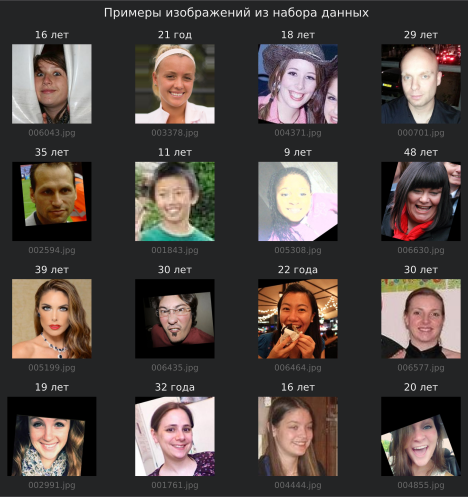

In [11]:
plot_16_img(
    labels_df['file_name'].sample(16),
    title='Примеры изображений из набора данных'
)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением графика (название самого графика). В названиях каждого фото (title)  можно указать возраст.

In [12]:
display(labels_df.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.0 <a class="tocSkip"> </h2>    

Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели `Jupiter Hub Kernel` и `Restart & Run All`
      
    
Жду от тебя новую версию проекта.    

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 01</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Добавил конструкцию <code>try</code> <code>except</code> для загрузки данных..</p>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    


In [13]:
display(
    labels_df['real_age'].describe()
)

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Размер выборки выведен. Тут еще следует добавить вывод, маленькая ли она? Возможно, стоит добавить, как этот размер скажется на обучении модели. К примеру, в Imagenet у нас 14 197 122 изображения

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Добавил вывод о размере набора данных..</p>
</div>

Конечно, выборка маловата. И точность модели отчасти поэтому не такая высокая `mae = 6.8285`  
Например:
- [IMDB-WIKI](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/) ->  460 723 + 62 328 изображений  
- [Google Facial Expression Comparison](https://analyticsindiamag.com/10-face-datasets-to-start-facial-recognition-projects/#h-4-google-facial-expression-comparison-dataset) -> 156K изображений  
- [Adience](https://talhassner.github.io/home/projects/Adience/Adience-data.html#frontalized) -> 26 580 изображений
- [UTKFace](https://analyticsindiamag.com/10-face-datasets-to-start-facial-recognition-projects/#h-7-utkface-large-scale-face-dataset) -> 20K изображений  

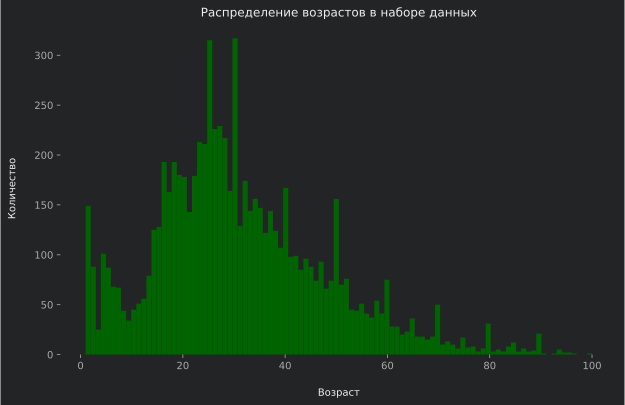

In [14]:
 plot_hist(
     labels_df['real_age'],
     title='Распределение возрастов в наборе данных'
 )

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Обрати внимание на пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его

In [15]:
display(
    get_pop_ages(amnt_to_return=4)
)

,file_name
real_age,
30,317
25,315
27,229
26,226


In [16]:
display(
    get_pop_ages(
        end_age=10,
        amnt_to_return=4
    )
)

,file_name
real_age,
1,149
4,101
2,88
5,87


In [17]:
display(
    get_pop_ages(
        start_age=20,
        end_age=40,
        amnt_to_return=4
    )
)

,file_name
real_age,
30,317
25,315
27,229
26,226


In [18]:
display(
    get_pop_ages(
        start_age=40,
        end_age=60,
        amnt_to_return=4
    )
)

,file_name
real_age,
40,167
50,156
42,99
41,98


Интересно что возросты 25 и 30 самые популярные в наборе данных.  
Похоже, что юбилейные возраста представлены более объёмно. Например 1, 30, 40, 50..
Медиана возраста 29 лет.
Распределение приближено к нормальному, но смещено вправо, а в левой части есть подьём гистограммы на значениях около 5 лет.

In [19]:
quantile_left = labels_df['real_age'].quantile(0.005)
quantile_right = labels_df['real_age'].quantile(0.995)

In [20]:
print(
    quantile_left,
    quantile_right,
    sep='\n'
)

1.0
88.05000000000018


In [21]:
faces_outside_quantiles = labels_df.loc[
        labels_df['real_age'] >= quantile_right,
        'file_name'
    ].sample(8)

faces_outside_quantiles = pd.concat(
        [labels_df.loc[
                labels_df['real_age'] <= quantile_left,
                'file_name'
            ].sample(8),
         faces_outside_quantiles
        ],
        axis=0,
        ignore_index=True
    )

In [22]:
sample_file_path = PATH_TO_IMG + '/' +  labels_df['file_name'].sample(1).values[0]
img_sample = Image.open(sample_file_path)

print(np.array(img_sample).shape)

(432, 431, 3)


In [23]:
plot_16_img(
    faces_outside_quantiles,
    title='Примеры изображений где возраст за пределами 99% интервала'
)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще добавить вывод, и указать, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Добавил наблюдения об изображениях..</p>
</div>

**Большенство изображений:**
- цветные
- лицо кадрированно
- соотношение сторон 1:1
- размер изображений разный  

**Редкие изображения:**
- соотношение сторон отличается от 1:1
- чернобелые
- лицо занимает меньшую часть кадра
- добавлены повороты (похоже, для того чтобы лицо было вертикально в кадре)
- добавлены сдвиги по x или y  
- с красивыми девушками )

**Очень редкие изображения:**
- не содержат людей в кадре

<a id='code'></a>
## Код Модели Из GPU Тренажёра

## Вывод Модели Из GPU Тренажёра

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Тут следует еще отобразить функции загрузчиков для обучающей и тестовой выборки, код обучения модели. Добавь, пожалуйста.

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Добавил раздел <strong>Код Модели Из GPU Тренажёра</strong>..</p>
</div>

[Код Модели Из GPU Тренажёра](#code)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ Обучения Модели

Похожего результата можно было добиться и за 14 эпох..  
Использовал слой dropout (Dropout), потомучто нашел совет на kaggle, чтобы модель не переобучалась.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

- Пожалуйста, подробнее опиши использованную модель и параметры. Укажи итоговое качество модели на тесте.
- Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи? (по желанию)
      

<div class="alert alert-info" role="alert" style="border-radius: 7px">
    <span style="font-size:0.7rem">Student's note 02</span>
<!--     <p class="mb-0"><strong>Комментарий:</strong></p> -->
    <p class="mb-0"><strong>Исправление:</strong></p>
    <p class="mb-0">Добавил подразделы:</p>
        <ul>
            <li>Модель и параметры</li>
            <li>Несколько слов о бизнесе</li>
        </ul>
</div>

### Модель и параметры

- архитектура сети ResNet50;
- начальные веса ImageNet, загрузили из файла;
- `include_top=False` — из сети исключили `global_average_pooling2d` и `dense`, добавили свои слои `dropout`
`global_average_pooling2d`, `dense`;
- включили тренировку ResNet50
- установили стартовый шаг градиентного спуска `learning_rate=0.0005` для алгоритма `Adam`;
- получили MAE = 6.8285 на тестовой выборке;

### Несколько слов о бизнесе

> Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
> - анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
> - контролировать добросовестность кассиров при продаже алкоголя.

Для рекомендаций покупателям и аналитики покупок по возрастным группам такая точность сети позволит группировать покупателей по 10 летним интервалам. Есть с чего начать)
Для контроля добросовестности точность маловата, нужно доучить на наборе данных побольше. Добавить больше выборки/изображений людей от 10 до 30 лет.

И да, об этической стороне вопроса, люди то в курсе что их изображения анализируют 🤷‍♂️ 

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера  <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>